In [2]:
pip install PyPortfolioOpt --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt import DiscreteAllocation, get_latest_prices


In [4]:
# Stock Pick
assets = ["NVDA", "ASTS","PLTR", "KO", "BTI", "FANG", "LYG", "GOOGL"]

In [5]:
# Assign Weights
weights = np.full(len(assets), 1 / len(assets))
print(weights)

[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [6]:
# Starting and Ending date
stockStartDate = '2021-01-01'
today = datetime.today().strftime("%Y-%m-%d")

print("Starting Date: ",stockStartDate)
print("Ending Date: ", today)

Starting Date:  2021-01-01
Ending Date:  2025-12-03


In [7]:
# DataFrame of adjusted Close Price
# This downloads ALL tickers at once
df = pd.DataFrame()
df = yf.download(assets, start=stockStartDate, end=today)['Close']

df

C:\Users\Owner\AppData\Local\Temp\ipykernel_12552\2327253012.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(assets, start=stockStartDate, end=today)['Close']
[*********************100%***********************]  8 of 8 completed


Ticker,ASTS,BTI,FANG,GOOGL,KO,LYG,NVDA,PLTR
Date,,,,,,,,
2021-01-04,12.950000,25.873026,39.621021,85.715324,45.391956,1.467761,13.077455,23.370001
2021-01-05,13.090000,26.229889,43.450336,86.406540,44.892960,1.491563,13.367904,24.600000
2021-01-06,12.940000,26.099491,45.595734,85.553917,43.464783,1.570901,12.579824,23.540001
2021-01-07,12.780000,26.181852,45.976242,88.109299,42.982979,1.547100,13.307320,25.000000
2021-01-08,12.690000,26.223032,45.951950,89.275757,43.946571,1.562968,13.240252,25.200001
...,...,...,...,...,...,...,...,...
2025-11-25,55.509998,56.660000,147.020004,323.440002,72.103561,4.820000,177.820007,163.550003
2025-11-26,55.520000,57.810001,149.309998,319.950012,72.371674,4.980000,180.259995,165.770004
2025-11-28,56.200001,58.660000,152.589996,320.179993,72.610001,5.100000,177.000000,168.449997


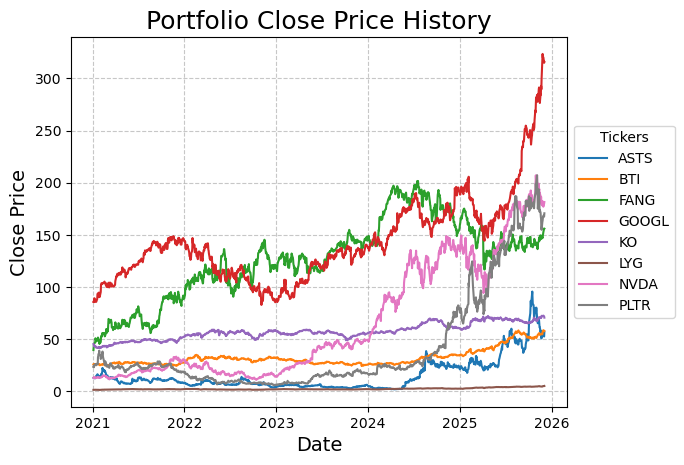

In [8]:
# Visual of stock
title = "Portfolio Close Price History"

my_stocks = df 

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title, fontsize = 18)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # x = 1 means just outside right edge
    title="Tickers"
)

plt.show()

In [9]:
# Daily simple returns:
returns = df.pct_change()
returns

Ticker,ASTS,BTI,FANG,GOOGL,KO,LYG,NVDA,PLTR
Date,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.010811,0.013793,0.096649,0.008064,-0.010993,0.016216,0.022210,0.052632
2021-01-06,-0.011459,-0.004971,0.049376,-0.009868,-0.031813,0.053192,-0.058953,-0.043089
2021-01-07,-0.012365,0.003156,0.008345,0.029869,-0.011085,-0.015152,0.057830,0.062022
2021-01-08,-0.007042,0.001573,-0.000528,0.013239,0.022418,0.010257,-0.005040,0.008000
...,...,...,...,...,...,...,...,...
2025-11-25,0.009273,0.034319,-0.004199,0.015255,0.000276,0.043290,-0.025911,0.008012
2025-11-26,0.000180,0.020297,0.015576,-0.010790,0.003718,0.033195,0.013722,0.013574
2025-11-28,0.012248,0.014703,0.021968,0.000719,0.003293,0.024096,-0.018085,0.016167


In [10]:
# Annualized Covariance Matrix:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

Ticker,ASTS,BTI,FANG,GOOGL,KO,LYG,NVDA,PLTR
Ticker,,,,,,,,
ASTS,1.199592,0.014928,0.054653,0.070429,0.004661,0.066801,0.145601,0.192941
BTI,0.014928,0.042282,0.014047,0.006678,0.011847,0.024124,0.004197,0.008940
FANG,0.054653,0.014047,0.165668,0.025362,0.004701,0.043883,0.044808,0.046170
GOOGL,0.070429,0.006678,0.025362,0.097805,0.007065,0.028479,0.086672,0.079556
KO,0.004661,0.011847,0.004701,0.007065,0.025275,0.011502,0.001337,-0.003163
LYG,0.066801,0.024124,0.043883,0.028479,0.011502,0.103672,0.050472,0.044859
NVDA,0.145601,0.004197,0.044808,0.086672,0.001337,0.050472,0.275711,0.168688
PLTR,0.192941,0.008940,0.046170,0.079556,-0.003163,0.044859,0.168688,0.466460


In [11]:
# Portfolio Variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

# Portfolio Standard Deviation/Risk
port_volatility = np.sqrt(port_variance)

# Annual Portfolio Returns
portSimpleAnnualReturn = np.sum(returns.mean() * weights) *252

# Expected Annual Return, Risk and Variance
percent_var = str(round(port_variance * 100, 1)) + "%"
percent_vols = str(round(port_volatility * 100, 1)) + "%"
percent_ret = str(round(portSimpleAnnualReturn * 100, 1)) + "%"

# Sharpe Ratio
risk_free_rate = 0.0
sharpe_ratio = (portSimpleAnnualReturn - risk_free_rate) / port_volatility

print("Expected Annual Return: ", percent_ret)
print("Expected Annual Risk: ",percent_vols)
print("Sharpe Ratio:", round(sharpe_ratio, 2))

Expected Annual Return:  42.9%
Expected Annual Risk:  27.7%
Sharpe Ratio: 1.55


In [12]:
# Portfolio Optimization

# Expected return and annualised sample covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Max Sharpe 
ef = EfficientFrontier(mu, S)
ef_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Efficient Performance:
ef.portfolio_performance(verbose=True)

Expected annual return: 32.1%
Annual volatility: 19.2%
Sharpe Ratio: 1.67


(0.32072870111635904, 0.19239554564940767, 1.6670276852500845)

In [21]:
# ---------------------------------------------------------------
# Rolling 3-yr Max-Sharpe weights, re-optimised **every month**
# ---------------------------------------------------------------
lookback_years  = 3

# Monthly prices & returns
m_prices = df.resample("M").last()
m_ret    = m_prices.pct_change().iloc[1:]

weights_log = {}      # {month-end date → weight-vector}

for dt in m_ret.index:
    # start once we have a full 36-month window
    win_start = dt - pd.DateOffset(years=lookback_years)
    hist = m_prices.loc[win_start:dt]
    if len(hist) < lookback_years * 12:
        continue

    # Max-Sharpe on the trailing window
    mu = expected_returns.mean_historical_return(hist)
    S  = risk_models.sample_cov(hist)
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe()

    w = pd.Series(ef.clean_weights()).reindex(m_ret.columns).fillna(0)
    weights_log[dt] = w

# ---------------------------------------------------------------
# Show the weight table
# ---------------------------------------------------------------
weights_table = pd.DataFrame(weights_log).T      # rows = month-ends
weights_table.index.name = "Month-End"
print("\nRolling 3-Year Max-Sharpe Weights (first live = Jan-2024)\n")
display(weights_table.round(4))



Rolling 3-Year Max-Sharpe Weights (first live = Jan-2024)



Ticker,ASTS,BTI,FANG,GOOGL,KO,LYG,NVDA,PLTR
Month-End,,,,,,,,
2023-12-31,0.0000,0.2392,0.1444,0.0000,0.0000,0.0000,0.6164,0.0000
2024-01-31,0.0000,0.3488,0.0000,0.0000,0.0000,0.0000,0.6512,0.0000
2024-02-29,0.0000,0.3483,0.0000,0.0000,0.0000,0.0000,0.6517,0.0000
2024-03-31,0.0000,0.3227,0.0000,0.0000,0.0000,0.0000,0.6773,0.0000
2024-04-30,0.0000,0.3001,0.0000,0.0000,0.0000,0.0000,0.6999,0.0000
2024-05-31,0.0000,0.2564,0.0000,0.0000,0.0000,0.0000,0.7436,0.0000
2024-06-30,0.0000,0.2613,0.0000,0.0000,0.0000,0.0000,0.7387,0.0000
2024-07-31,0.0000,0.3061,0.0000,0.0000,0.0000,0.0000,0.6939,0.0000
2024-08-31,0.0000,0.3090,0.0000,0.0000,0.0000,0.0000,0.6910,0.0000


C:\Users\Owner\AppData\Local\Temp\ipykernel_12552\3636938252.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(assets, start=stockStartDate, end=today)["Close"]
[*********************100%***********************]  8 of 8 completed


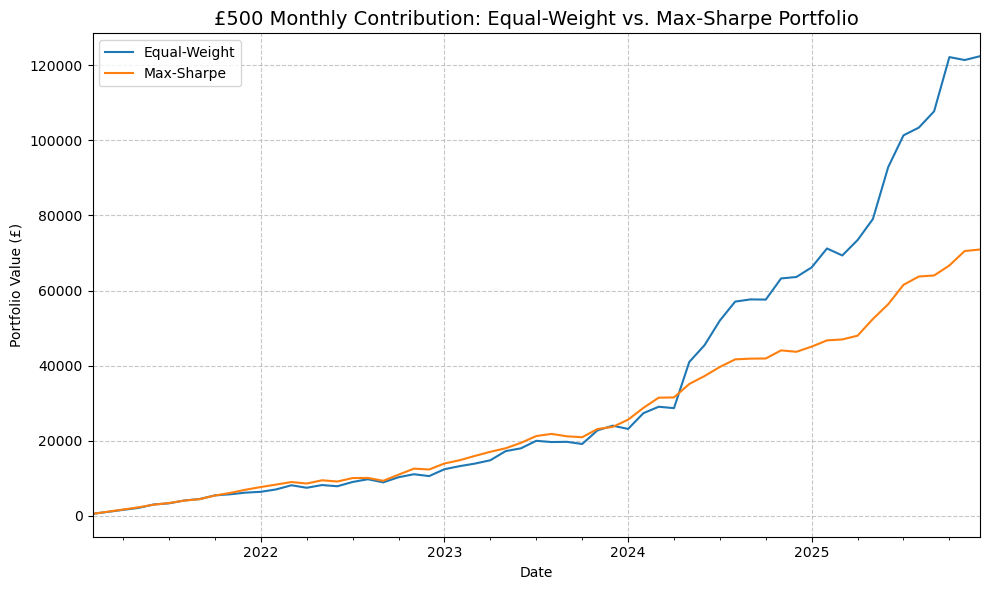

In [14]:
# --- 3. Compute *monthly* portfolio returns ----------------------------------
prices = yf.download(assets, start=stockStartDate, end=today)["Close"]
monthly_prices = prices.resample("M").last()
monthly_ret    = monthly_prices.pct_change().iloc[1:]   # skip NaN first row

port_ret_equal      = (monthly_ret * equal_weights_dict).sum(axis=1)
port_ret_max_sharpe = (monthly_ret * cleaned_weights).sum(axis=1)

# --- 4. Simulate £500 contribution at the *start* of every month -------------
def simulate(contributions, port_returns):
    """contributions (£) and port_returns (Series) must align by date index"""
    value = 0.0
    history = []
    for date, r in port_returns.items():
        value = (value + contributions) * (1 + r)   # add £500, then grow
        history.append((date, value))
    return pd.Series(dict(history))

monthly_contrib = 500
value_equal      = simulate(monthly_contrib, port_ret_equal)
value_max_sharpe = simulate(monthly_contrib, port_ret_max_sharpe)

# Combine for plotting
perf = pd.DataFrame({
    "Equal-Weight": value_equal,
    "Max-Sharpe":   value_max_sharpe
})

# --- 5. Plot -----------------------------------------------------------------
plt.figure(figsize=(10,6))
perf.plot(ax=plt.gca())
plt.title("£500 Monthly Contribution: Equal-Weight vs. Max-Sharpe Portfolio", fontsize=14)
plt.ylabel("Portfolio Value (£)")
plt.xlabel("Date")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

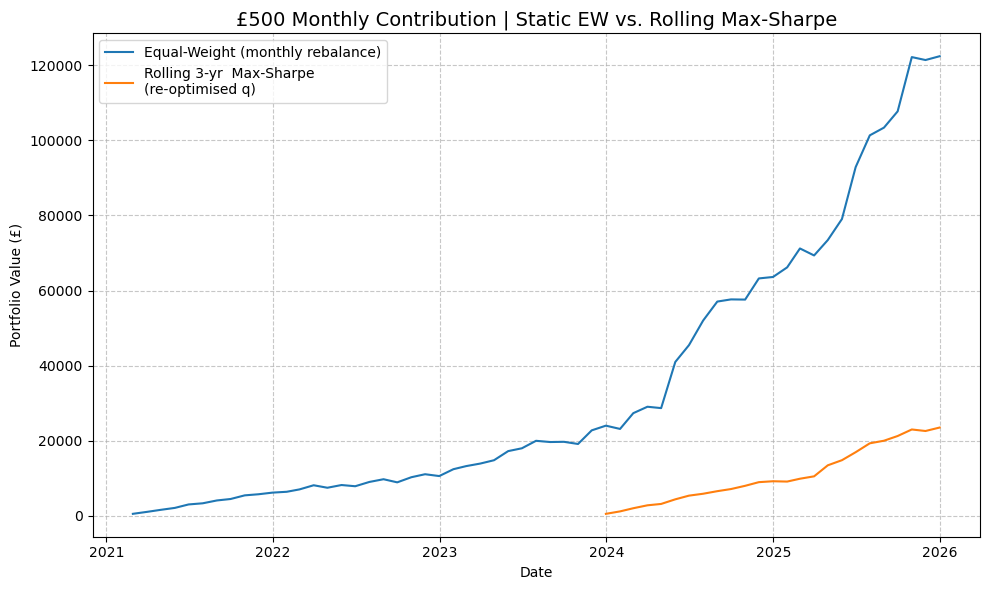

In [19]:
# ------------------------------------------------------------------
# PARAMETERS you can tweak
# ------------------------------------------------------------------
lookback_years   = 3            # trailing window for optimiser
rebalance_freq   = "Q"          # 'Q' = quarterly, can use '6M', 'A' etc.
monthly_contrib  = 500          # £ added at the START of each month

# ---------------------------------------------------------------
# Align equal-weight series to the first date in quarterly_val
# ---------------------------------------------------------------
first_live = quarterly_val.index.min()           # e.g. 2024-03-31
equal_val  = equal_val.loc[first_live:]          # drop earlier months
equal_val.iloc[0] = 0.0                          # reset starting value


# ------------------------------------------------------------------
# 1. Prep monthly data
# ------------------------------------------------------------------
monthly_prices = df.resample("M").last()
monthly_ret    = monthly_prices.pct_change().iloc[1:]         # skip NaN

# ------------------------------------------------------------------
# 2. Determine re-balance dates  (quarter-ends)
# ------------------------------------------------------------------
rebalance_dates = monthly_prices.resample(rebalance_freq).last().index

# ------------------------------------------------------------------
# 3. Walk-forward simulation
# ------------------------------------------------------------------
walk_value  = {}                      # date → portfolio value
value       = 0.0                     # running £ value
weights_log = {}                      # (optional) store weights by date

for i, reb_date in enumerate(rebalance_dates):
    
    # --- 3a. Skip until we have enough look-back history ------------
    window_start = reb_date - pd.DateOffset(years=lookback_years)
    hist_window  = monthly_prices.loc[window_start:reb_date]
    if len(hist_window) < lookback_years * 12:
        continue                     # not enough data yet
    
    # --- 3b. Optimise on trailing window ----------------------------
    mu = expected_returns.mean_historical_return(hist_window)
    S  = risk_models.sample_cov(hist_window)

    ef = EfficientFrontier(mu, S)
    ef.max_sharpe()
    w  = ef.clean_weights()                     # dict
    w  = pd.Series(w).reindex(monthly_ret.columns).fillna(0)  # align
    weights_log[reb_date] = w                  # optional bookkeeping
    
    # --- 3c. Apply those weights until the next rebalance ----------
    if i < len(rebalance_dates) - 1:
        nxt = rebalance_dates[i+1] - pd.offsets.MonthEnd(1)
        fwd_months = monthly_ret.loc[reb_date+pd.offsets.MonthEnd(0) : nxt]
    else:                                     # last chunk → until end
        fwd_months = monthly_ret.loc[reb_date+pd.offsets.MonthEnd(0) :]

    for dt, r in fwd_months.iterrows():
        value = (value + monthly_contrib) * (1 + np.dot(r, w))
        walk_value[dt] = value

# ------------------------------------------------------------------
# 4. Convert to Series and plot versus the static equal-weight
# ------------------------------------------------------------------
quarterly_val = pd.Series(walk_value).sort_index()

# equal-weight path you already have:
equal_val = simulate(monthly_contrib, 
                     (monthly_ret * weights).sum(axis=1))

plt.figure(figsize=(10,6))
plt.plot(equal_val,      label="Equal-Weight (monthly rebalance)")
plt.plot(quarterly_val,  label=f"Rolling {lookback_years}-yr  Max-Sharpe\n"
                               f"(re-optimised {rebalance_freq.lower()})")
plt.title("£500 Monthly Contribution | Static EW vs. Rolling Max-Sharpe",
          fontsize=14)
plt.xlabel("Date"); plt.ylabel("Portfolio Value (£)")
plt.grid(True, ls="--", alpha=.7); plt.legend(); plt.tight_layout()
plt.show()
